In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def options_from_dirname(dirname):
    tokens = dirname.split("_")
    epoch = int(tokens[2])
    built_ts = tokens[3]
    nr_samples = int(tokens[5])

    neg_samples = tokens[10] == "True"
    centroid_of_gt = tokens[15] == "True"
    center_of_bbox = tokens[20] == "True"
    quarter_four_points = tokens[25] == "True"
    bbox = tokens[27] == "True"
    jitter_bbox = float(tokens[29].replace("-", "."))
    freeze_sam_body = tokens[33] == "True"
    freeze_sam_head = tokens[37] == "True"
    return (
        epoch,
        built_ts,
        nr_samples,
        neg_samples,
        centroid_of_gt,
        center_of_bbox,
        quarter_four_points,
        bbox,
        jitter_bbox,
        freeze_sam_body,
        freeze_sam_head,
    )

In [4]:
experiments = {}

for experiment in Path("out").glob("*"):
    results = experiment / "inference" / "validation_results.csv"
    df = pd.read_csv(results)
    dirname = experiment.name
    (
        epoch,
        built_ts,
        nr_samples,
        neg_samples,
        centroid_of_gt,
        center_of_bbox,
        quarter_four_points,
        bbox,
        jitter_bbox,
        freeze_sam_body,
        freeze_sam_head,
    ) = options_from_dirname(dirname)
    df["nr_samples"] = nr_samples
    df["neg_samples"] = neg_samples
    df["centroid_of_gt"] = centroid_of_gt
    df["center_of_bbox"] = center_of_bbox
    df["quarter_four_points"] = quarter_four_points
    df["bbox"] = bbox
    df["jitter_bbox"] = jitter_bbox
    df["freeze_sam_body"] = freeze_sam_body
    df["freeze_sam_head"] = freeze_sam_head
    df["dirname"] = dirname
    experiments[experiment.name] = df

In [5]:
for experiment, df in experiments.items():
    print(experiment)
    print(df.Dice.min())
    print(df.Dice.mean())
    print(df.Dice.max())
    print()

sam_torch_75_300_ce_0_samples_use_neg_samples_False_sample_centroid_of_gt_False_sample_center_of_bbox_False_samples_quarter_four_points_False_bbox_True_jitter_0-1_freeze_sam_body_True_freeze_sam_head_False
0.0768049155145929
83.79359462479593
98.955440962581

sam_torch_75_300_ce_0_samples_use_neg_samples_False_sample_centroid_of_gt_False_sample_center_of_bbox_False_samples_quarter_four_points_False_bbox_True_jitter_0-05_freeze_sam_body_True_freeze_sam_head_False
12.972336668628609
90.76843024712187
98.66385835582176

sam_torch_75_300_ce_100_samples_use_neg_samples_False_sample_centroid_of_gt_False_sample_center_of_bbox_False_samples_quarter_four_points_False_bbox_False_jitter_0-0_freeze_sam_body_True_freeze_sam_head_False
56.553755522827686
94.00996809358368
98.93087190384487

sam_torch_75_300_ce_0_samples_use_neg_samples_False_sample_centroid_of_gt_True_sample_center_of_bbox_False_samples_quarter_four_points_False_bbox_False_jitter_0-0_freeze_sam_body_True_freeze_sam_head_False
1.7272

In [6]:
DF = pd.concat(list(experiments.values()))

In [7]:
"""import paxplot

cols = [
    "jitter_bbox",
    "neg_samples",
    "centroid_of_gt",
    "center_of_bbox",
    "quarter_four_points",
    "bbox",
    # "freeze_sam_body",
    # "freeze_sam_head",
    "Dice",
]
paxfig = paxplot.pax_parallel(n_axes=len(cols))
paxfig.plot((DF[cols] * 1).to_numpy(), line_kwargs={"alpha": 0.2})

paxfig.set_labels(cols)

paxfig.add_colorbar(
    ax_idx=len(cols) - 1, cmap="plasma", colorbar_kwargs={"label": "Dice"}
)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.show()"""

'import paxplot\n\ncols = [\n    "jitter_bbox",\n    "neg_samples",\n    "centroid_of_gt",\n    "center_of_bbox",\n    "quarter_four_points",\n    "bbox",\n    # "freeze_sam_body",\n    # "freeze_sam_head",\n    "Dice",\n]\npaxfig = paxplot.pax_parallel(n_axes=len(cols))\npaxfig.plot((DF[cols] * 1).to_numpy(), line_kwargs={"alpha": 0.2})\n\npaxfig.set_labels(cols)\n\npaxfig.add_colorbar(\n    ax_idx=len(cols) - 1, cmap="plasma", colorbar_kwargs={"label": "Dice"}\n)\n\nfig = plt.gcf()\nfig.set_size_inches(18.5, 10.5)\n\nplt.show()'

/tmp/ipykernel_2313600/1187804636.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


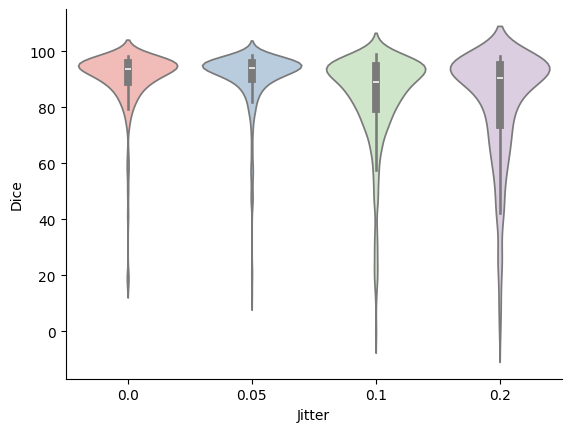

In [8]:
sns.violinplot(
    data=DF[(~DF.quarter_four_points)
    & (~DF.centroid_of_gt)
    & (~DF.center_of_bbox)
    & (DF.bbox)
    & (DF.nr_samples == 0)],
    x="jitter_bbox",
    y="Dice",
    palette="Pastel1",
)
plt.xlabel("Jitter")
sns.despine()
plt.show()

In [9]:
print(
    DF[
        (~DF.quarter_four_points)
        & (~DF.centroid_of_gt)
        & (~DF.center_of_bbox)
        & (DF.bbox)
        & (DF.nr_samples == 0)
        & (DF.jitter_bbox == 0)
    ].Dice.max(),
    DF[(DF.nr_samples == 0) & (DF.jitter_bbox == 0.05)].Dice.max(),
)
print(
    DF[
        (~DF.quarter_four_points)
        & (~DF.centroid_of_gt)
        & (~DF.center_of_bbox)
        & (DF.bbox)
        & (DF.nr_samples == 0)
        & (DF.jitter_bbox == 0)
    ].Dice.min(),
    DF[(DF.nr_samples == 0) & (DF.jitter_bbox == 0.05)].Dice.min(),
)
print(
    DF[
        (~DF.quarter_four_points)
        & (~DF.centroid_of_gt)
        & (~DF.center_of_bbox)
        & (DF.bbox)
        & (DF.nr_samples == 0)
        & (DF.jitter_bbox == 0)
    ].Dice.mean(),
    DF[(DF.nr_samples == 0) & (DF.jitter_bbox == 0.05)].Dice.mean(),
)

98.24928142147895 98.66385835582176
18.089020771513358 12.972336668628609
90.59275363118435 90.76843024712187


/tmp/ipykernel_2313600/2779198868.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


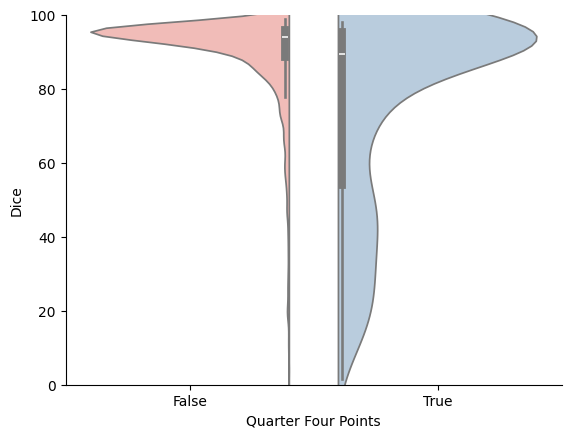

In [10]:
sns.violinplot(
    data=DF, x="quarter_four_points", y="Dice", palette="Pastel1", split=True
)
plt.xlabel("Quarter Four Points")
plt.ylim(0, 100)
sns.despine()
plt.show()

In [22]:
DF.to_csv("kvasir_eval.csv")

/tmp/ipykernel_2313600/879093237.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


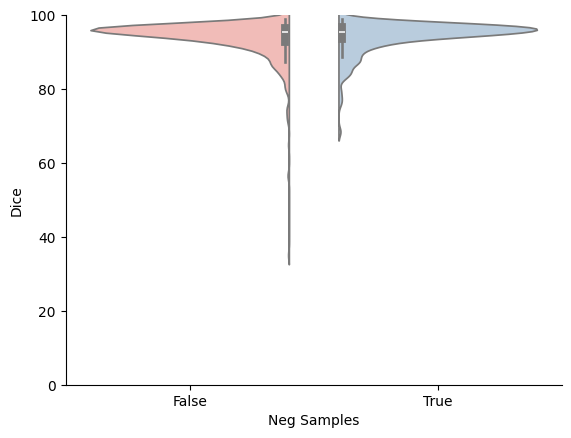

In [12]:
sns.violinplot(
    data=DF[
        (DF.quarter_four_points == False)
        & (DF.jitter_bbox == 0.0)
        & (DF.nr_samples == 100)
    ],
    x="neg_samples",
    y="Dice",
    palette="Pastel1",
    split=True,
)
plt.xlabel("Neg Samples")
plt.ylim(0, 100)
sns.despine()
plt.show()

/tmp/ipykernel_2313600/3703390056.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


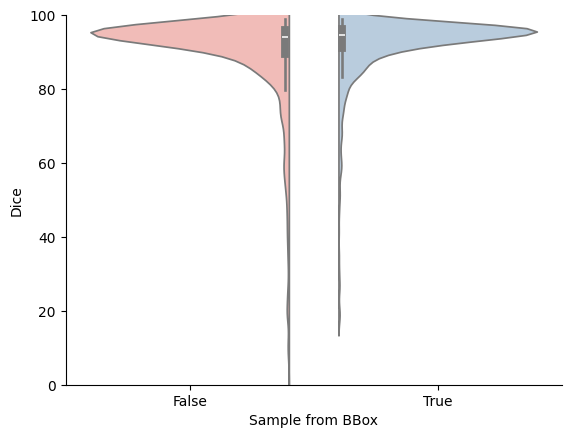

In [13]:
sns.violinplot(
    data=DF[
        (DF.quarter_four_points == False)
        & (DF.jitter_bbox == 0.0)
        & (DF.neg_samples == False)
    ],
    x="bbox",
    y="Dice",
    palette="Pastel1",
    split=True,
)
plt.xlabel("Sample from BBox")
plt.ylim(0, 100)
sns.despine()
plt.show()

/tmp/ipykernel_2313600/2179519854.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


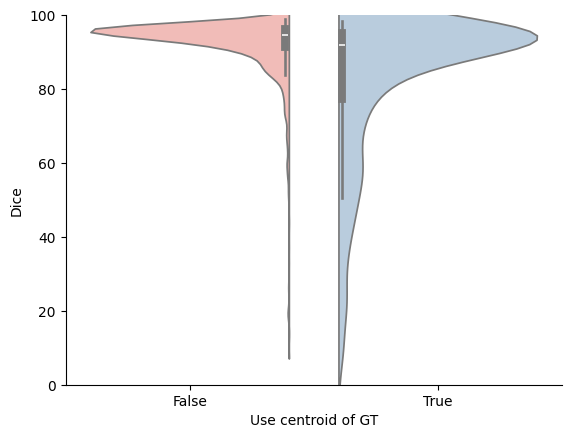

In [14]:
sns.violinplot(
    data=DF[(DF.quarter_four_points == False) & (DF.jitter_bbox == 0.0)],
    x="centroid_of_gt",
    y="Dice",
    palette="Pastel1",
    split=True,
)
plt.xlabel("Use centroid of GT")
plt.ylim(0, 100)
sns.despine()
plt.show()

/tmp/ipykernel_2313600/528653464.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


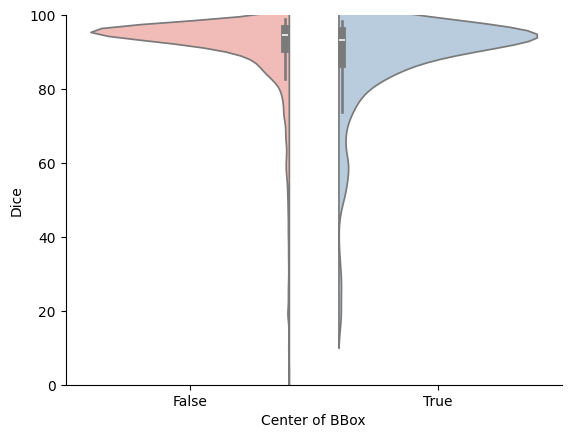

In [15]:
sns.violinplot(
    data=DF[(DF.quarter_four_points == False) & (DF.jitter_bbox == 0.0)],
    x="center_of_bbox",
    y="Dice",
    palette="Pastel1",
    split=True,
)
plt.xlabel("Center of BBox")
plt.ylim(0, 100)
sns.despine()
plt.show()

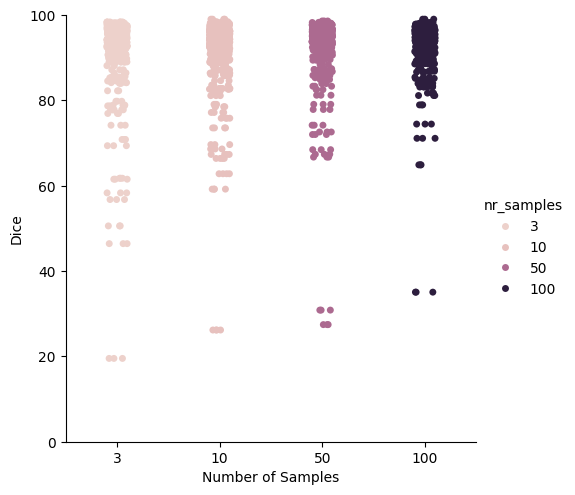

In [16]:
sns.catplot(
    data=DF[
        (DF.quarter_four_points == False)
        & (DF.jitter_bbox == 0.0)
        & (DF.nr_samples > 0)
        & (DF.bbox)
        & ~(DF.neg_samples)
    ],
    x="nr_samples",
    y="Dice",
    hue="nr_samples",
)

plt.xlabel("Number of Samples")
plt.ylim(0, 100)
sns.despine()
plt.show()

In [17]:
df_vanilla = DF[
    ~DF.quarter_four_points
    & (DF.jitter_bbox == 0.0)
    & (DF.nr_samples > 0)
    & DF.bbox
    & ~DF.neg_samples
]

print(df_vanilla.Dice.min())
challenging = df_vanilla[df_vanilla.Dice < 50]
challenging

19.530730502517336


Epoch               Task                             ID       Dice  \
31      75  Task300_KvasirSEG  cju2hfqnmhisa0993gpleeldd.png  26.187518   
231     75  Task300_KvasirSEG  cju2hfqnmhisa0993gpleeldd.png  26.187518   
431     75  Task300_KvasirSEG  cju2hfqnmhisa0993gpleeldd.png  26.187518   
549     75  Task300_KvasirSEG  cju2hfqnmhisa0993gpleeldd.png  26.187518   
31      75  Task300_KvasirSEG  cju2hfqnmhisa0993gpleeldd.png  27.452588   
33      75  Task300_KvasirSEG  cju2hjrqcvi2j0801bx1i6gxg.png  30.855615   
231     75  Task300_KvasirSEG  cju2hfqnmhisa0993gpleeldd.png  27.452588   
233     75  Task300_KvasirSEG  cju2hjrqcvi2j0801bx1i6gxg.png  30.855615   
431     75  Task300_KvasirSEG  cju2hfqnmhisa0993gpleeldd.png  27.452588   
433     75  Task300_KvasirSEG  cju2hjrqcvi2j0801bx1i6gxg.png  30.855615   
31      75  Task300_KvasirSEG  cju2hfqnmhisa0993gpleeldd.png  35.062612   
231     75  Task300_KvasirSEG  cju2hfqnmhisa0993gpleeldd.png  35.062612   
431     75  Task300_KvasirSEG  cju2hfqnmhisa0993gpleeldd.png  35.062612   
31      75  Task300_KvasirSEG  cju2hfqnmhisa0993gpleeldd.png  19.530731   
49      75  Task300_KvasirSEG  cju2ro5jqsy680988pi6qsujw.png  46.434816   
231     75  Task300_KvasirSEG  cju2hfqnmhisa0993gpleeldd.png  19.530731   
249     75  Task300_KvasirSEG  cju2ro5jqsy680988pi6qsujw.png  46.434816   
431     75  Task300_KvasirSEG  cju2hfqnmhisa0993gpleeldd.png  19.530731   
449     75  Task300_KvasirSEG  cju2ro5jqsy680988pi6qsujw.png  46.434816   

           IoU  nr_samples  neg_samples  centroid_of_gt  center_of_bbox  \
31   15.066535          10        False           False           False   
231  15.066535          10        False           False           False   
431  15.066535          10        False           False           False   
549  15.066535          10        False           False           False   
31   15.910171          50        False           False           False   
33   18.242175          50        False           False           False   
231  15.910171          50        False           False           False   
233  18.242175          50        False           False           False   
431  15.910171          50        False           False           False   
433  18.242175          50        False           False           False   
31   21.258134         100        False           False           False   
231  21.258134         100        False           False           False   
431  21.258134         100        False           False           False   
31   10.822192           3        False           False           False   
49   30.237854           3        False           False           False   
231  10.822192           3        False           False           False   
249  30.237854           3        False           False           False   
431  10.822192           3        False           False           False   
449  30.237854           3        False           False           False   

     quarter_four_points  bbox  jitter_bbox  freeze_sam_body  freeze_sam_head  \
31                 False  True          0.0             True            False   
231                False  True          0.0             True            False   
431                False  True          0.0             True            False   
549                False  True          0.0             True            False   
31                 False  True          0.0             True            False   
33                 False  True          0.0             True            False   
231                False  True          0.0             True            False   
233                False  True          0.0             True            False   
431                False  True          0.0             True            False   
433                False  True          0.0             True            False   
31                 False  True          0.0             True            False   
231                False  True 

99.0546704567991
99.0546704567991
cju2xd75m82720801q4s4ik3n.png


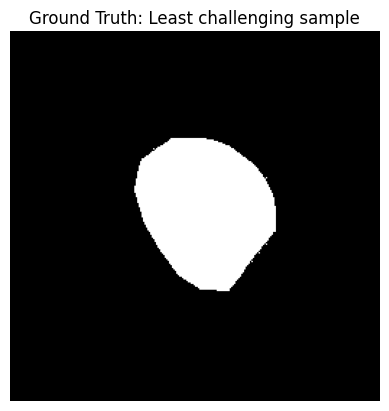

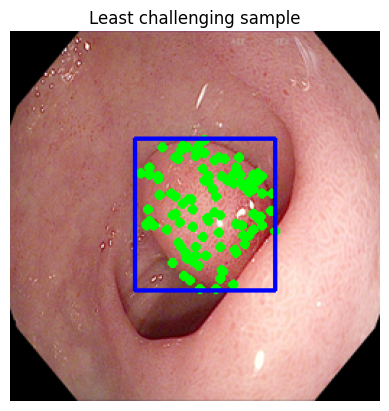

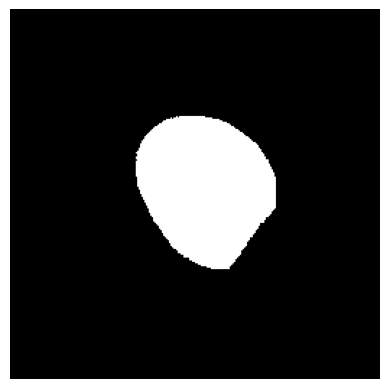

In [18]:
print(df_vanilla.Dice.max())
easy = df_vanilla.sort_values("Dice").iloc[-1]
print(easy.Dice)


best = DF[DF.ID == easy.ID].sort_values("Dice").iloc[-1]
best_path = Path("out") / best.dirname / "inference" / "Epoch_75" / "Task300_KvasirSEG" / best.ID

print(easy.ID)

from PIL import Image

gt = Image.open(best_path / "seg_gt.png")
plt.imshow(gt, cmap="gray")
plt.axis("off")
plt.title("Ground Truth: Least challenging sample")
plt.show()

best_image = Image.open(best_path / "slice_0.png")
plt.imshow(best_image, cmap="gray")
plt.axis("off")
plt.title("Least challenging sample")
plt.show()

best_image = Image.open(best_path / "pred_seg.png")
plt.imshow(best_image, cmap="gray")
plt.axis("off")
#plt.title("Best prediction on least challenging sample")
plt.show()

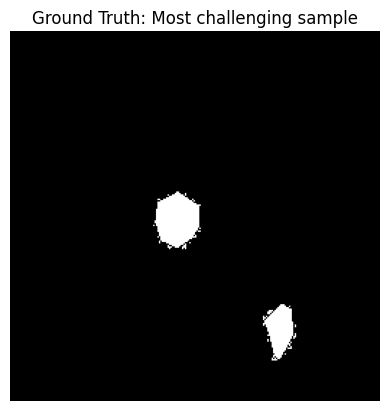

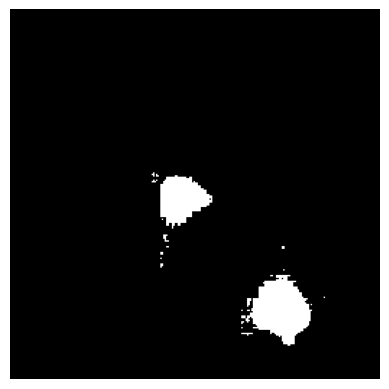

In [19]:
best = DF[DF.ID == "cju2hfqnmhisa0993gpleeldd.png"].sort_values("Dice").iloc[-1]
best_path = Path("out") / best.dirname / "inference" / "Epoch_75" / "Task300_KvasirSEG" / best.ID

from PIL import Image

gt = Image.open(best_path / "seg_gt.png")
plt.imshow(gt, cmap="gray")
plt.axis("off")
plt.title("Ground Truth: Most challenging sample")
plt.show()

best_image = Image.open(best_path / "pred_seg.png")
plt.imshow(best_image, cmap="gray")
plt.axis("off")
#plt.title("Best prediction on most challenging sample")
plt.show()

Text(0.5, 1.0, 'Worst prediction on most challenging sample')

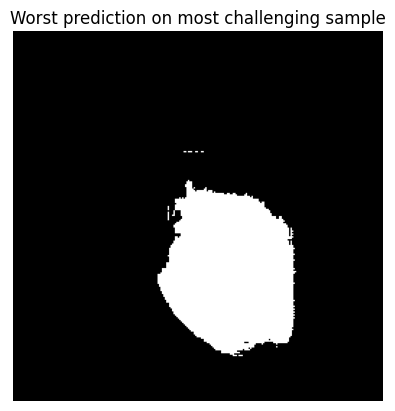

In [20]:
worst = DF[DF.ID == "cju2hfqnmhisa0993gpleeldd.png"].sort_values("Dice").iloc[0]

worst_path = (
    Path("out")
    / worst.dirname
    / "inference"
    / "Epoch_75"
    / "Task300_KvasirSEG"
    / worst.ID
)

from PIL import Image

worst_seg = Image.open(worst_path / "pred_seg.png")
plt.imshow(worst_seg, cmap="gray")
plt.axis("off")
plt.title("Worst prediction on most challenging sample")

0 centroid of gt: False center of bbox: False negsamples: False jitter: 0.1 center_of_bbox: False quarter_four_points: False


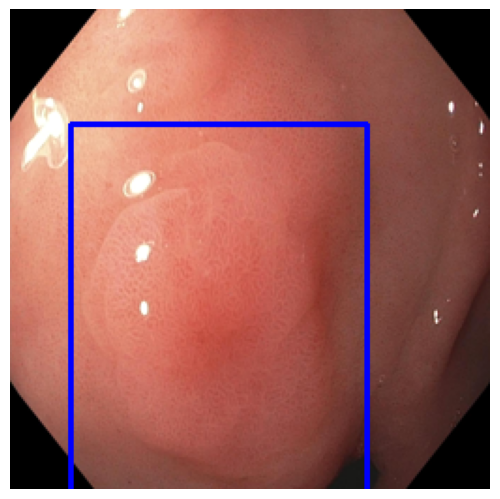

0 centroid of gt: False center of bbox: False negsamples: False jitter: 0.05 center_of_bbox: False quarter_four_points: False


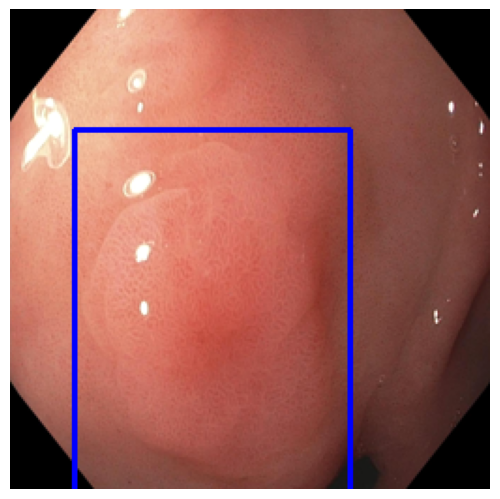

100 centroid of gt: False center of bbox: False negsamples: False jitter: 0.0 center_of_bbox: False quarter_four_points: False


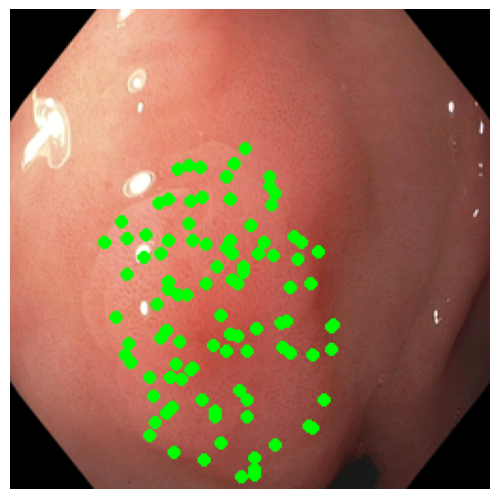

0 centroid of gt: True center of bbox: False negsamples: False jitter: 0.0 center_of_bbox: False quarter_four_points: False


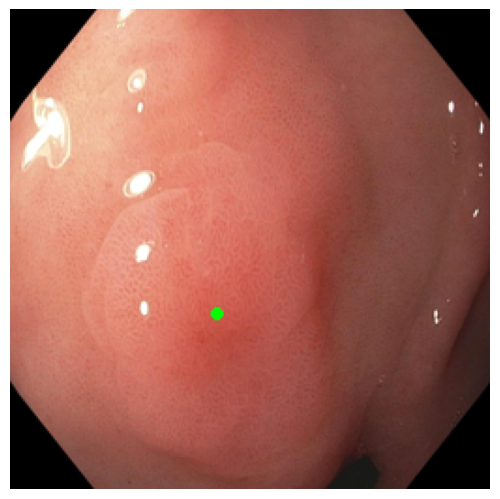

3 centroid of gt: False center of bbox: False negsamples: False jitter: 0.0 center_of_bbox: False quarter_four_points: False


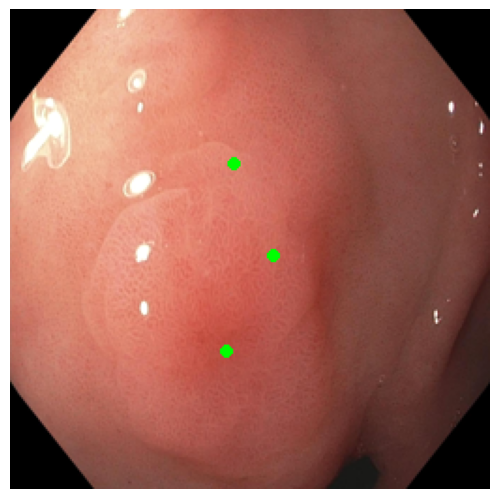

10 centroid of gt: False center of bbox: False negsamples: False jitter: 0.0 center_of_bbox: False quarter_four_points: False


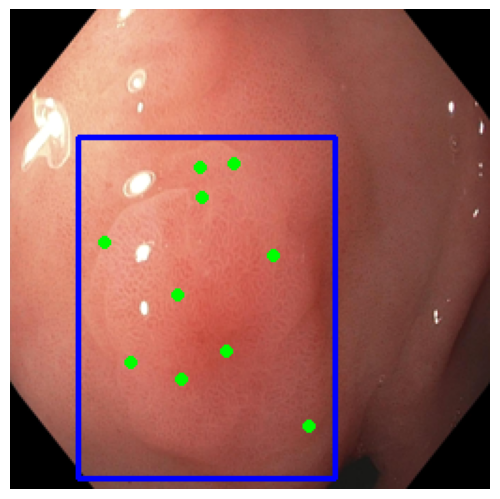

10 centroid of gt: False center of bbox: False negsamples: False jitter: 0.0 center_of_bbox: False quarter_four_points: False


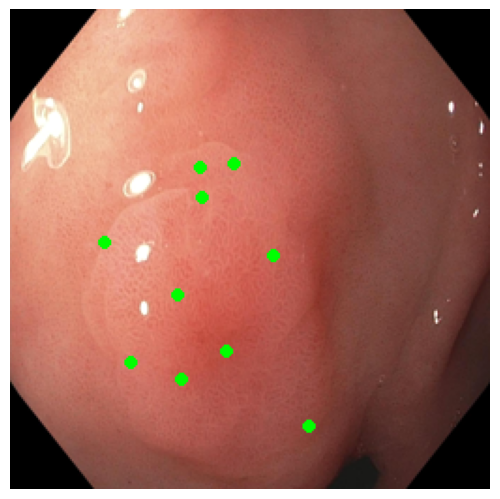

0 centroid of gt: False center of bbox: False negsamples: False jitter: 0.0 center_of_bbox: False quarter_four_points: True


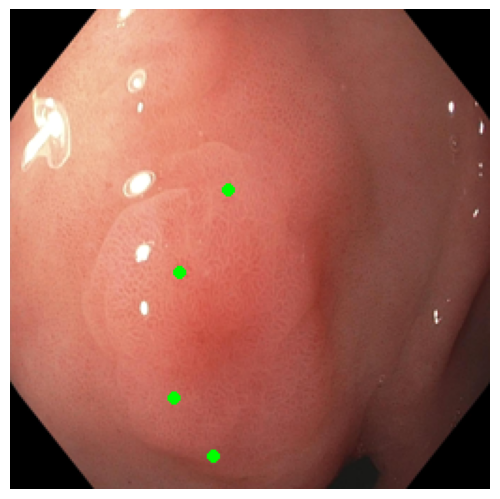

0 centroid of gt: False center of bbox: False negsamples: False jitter: 0.2 center_of_bbox: False quarter_four_points: False


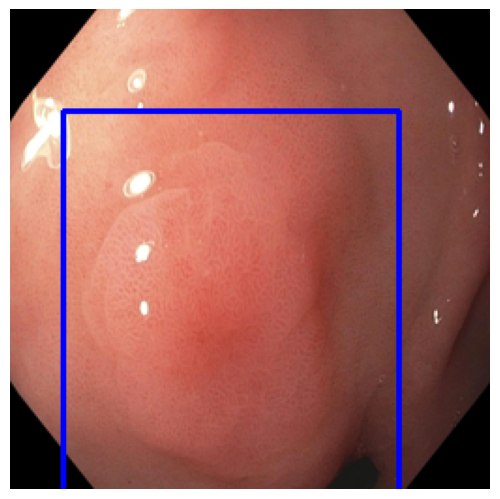

0 centroid of gt: False center of bbox: False negsamples: False jitter: 0.0 center_of_bbox: False quarter_four_points: False


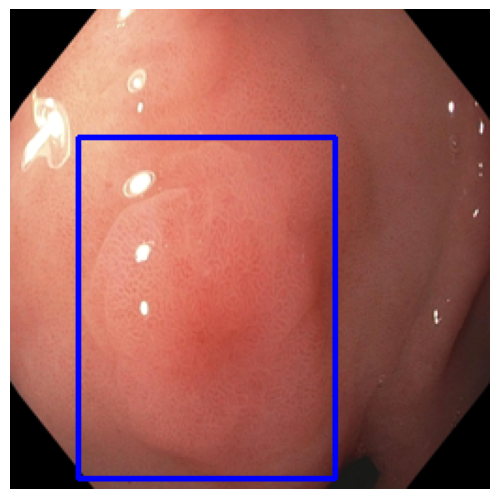

50 centroid of gt: False center of bbox: False negsamples: False jitter: 0.0 center_of_bbox: False quarter_four_points: False


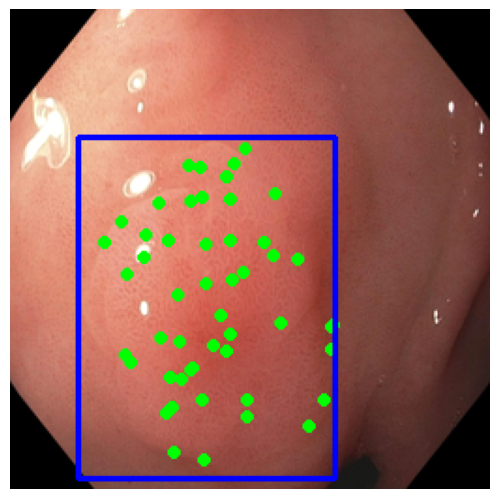

100 centroid of gt: False center of bbox: False negsamples: True jitter: 0.0 center_of_bbox: False quarter_four_points: False


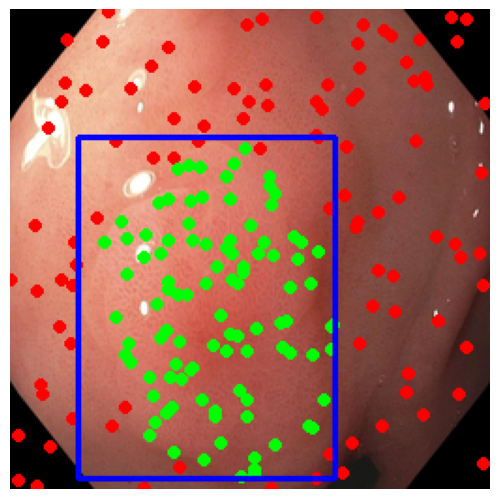

50 centroid of gt: False center of bbox: False negsamples: False jitter: 0.0 center_of_bbox: False quarter_four_points: False


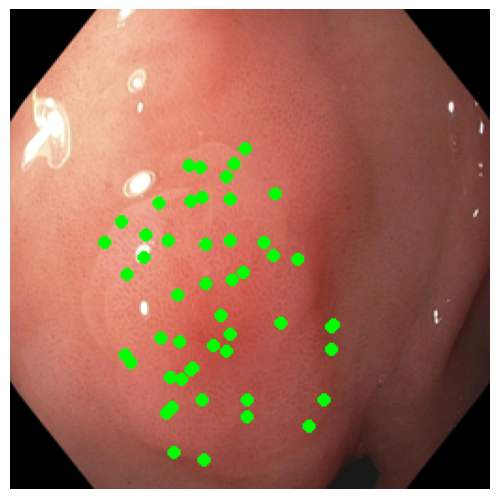

100 centroid of gt: False center of bbox: False negsamples: False jitter: 0.0 center_of_bbox: False quarter_four_points: False


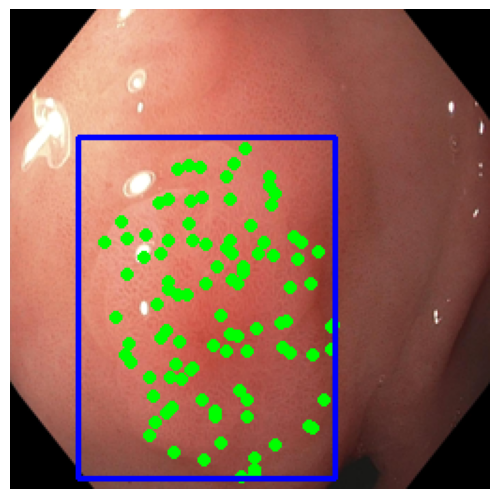

3 centroid of gt: False center of bbox: False negsamples: False jitter: 0.0 center_of_bbox: False quarter_four_points: False


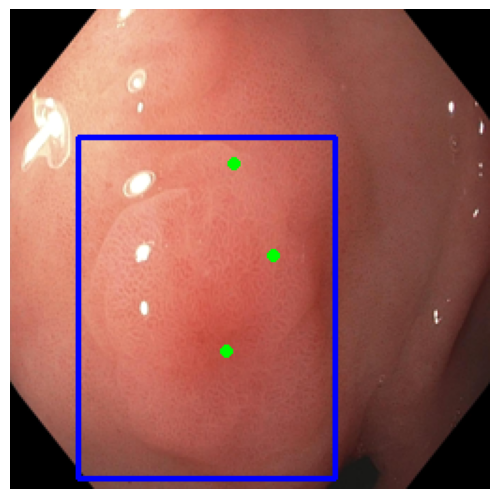

0 centroid of gt: False center of bbox: True negsamples: False jitter: 0.0 center_of_bbox: True quarter_four_points: False


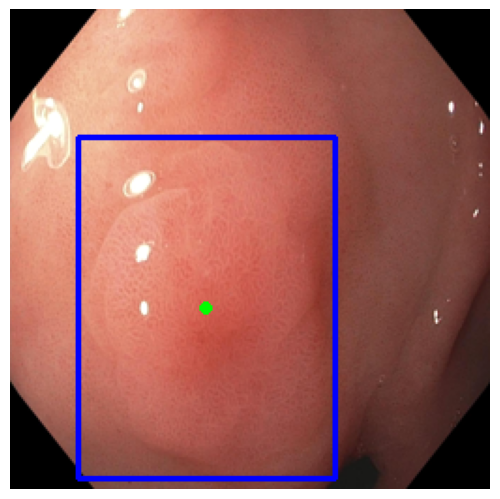

In [21]:
experiments = {}

for experiment in Path("out").glob("*"):
    image_name = "cju0qoxqj9q6s0835b43399p4.png"
    image_path = (
        experiment
        / "inference"
        / "Epoch_75"
        / "Task300_KvasirSEG"
        / image_name
        / "slice_0.png"
    )
    image = Image.open(image_path)

    dirname = experiment.name
    (
        epoch,
        built_ts,
        nr_samples,
        neg_samples,
        centroid_of_gt,
        center_of_bbox,
        quarter_four_points,
        bbox,
        jitter_bbox,
        freeze_sam_body,
        freeze_sam_head,
    ) = options_from_dirname(dirname)
    print(
        nr_samples,
        "centroid of gt:",
        centroid_of_gt,
        "center of bbox:",
        center_of_bbox,
        "negsamples:",
        neg_samples,
        "jitter:",
        jitter_bbox,
        "center_of_bbox:",
        center_of_bbox,
        "quarter_four_points:",
        quarter_four_points,
    )
    plt.imshow(image)
    plt.axis("off")
    plt.tight_layout()
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    plt.margins(0, 0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.show()